In [6]:
from __future__ import print_function

import numpy as np
import pandas as pd

from datetime import datetime

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns


from sklearn.cluster import KMeans
kmeans = KMeans()


In [7]:
df = pd.read_pickle('./df.pkl')

In [3]:
df.shape

(5410, 10)

In [8]:
df.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy
0,PRV51003,Yes,3.67,117,132,1.13,671956,5743.21,0,4
1,PRV51005,Yes,1.09,495,1165,2.35,284610,574.97,2,98
2,PRV51021,Yes,2.00,208,257,1.24,380322,1828.47,1,17
3,PRV51037,Yes,1.53,206,454,2.20,367754,1785.21,3,37
4,PRV51052,Yes,2.28,37,46,1.24,33146,895.84,0,3


In [10]:
my_palette = {'No': 'b', 'Yes': 'r'}

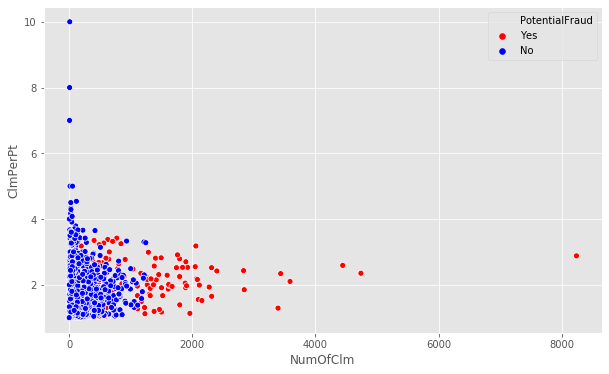

In [11]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x = 'NumOfClm', y = 'ClmPerPt', hue = 'PotentialFraud',\
               data = df, palette = my_palette)

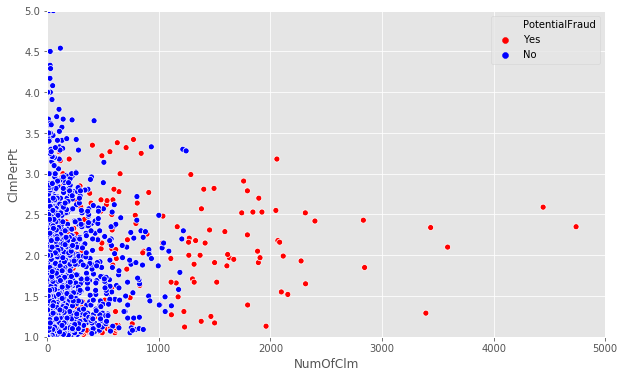

In [12]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x = 'NumOfClm', y = 'ClmPerPt', hue = 'PotentialFraud',\
               data = df, palette = my_palette)
ax.set(xlim = (0, 5000),ylim = (1, 5))
plt.show()

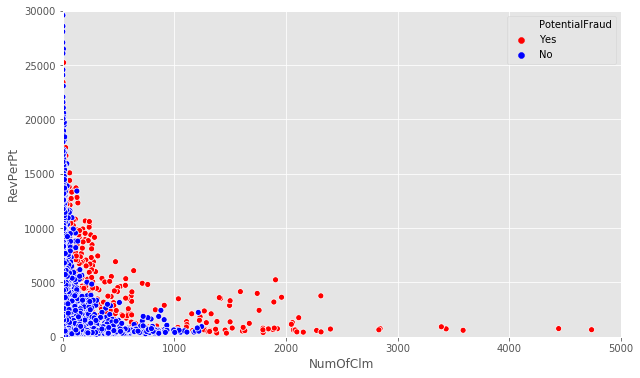

In [13]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x = 'NumOfClm', y = 'RevPerPt', hue = 'PotentialFraud',\
               data = df, palette = my_palette)
ax.set(xlim = (0, 5000),ylim = (0, 30000))
plt.show()

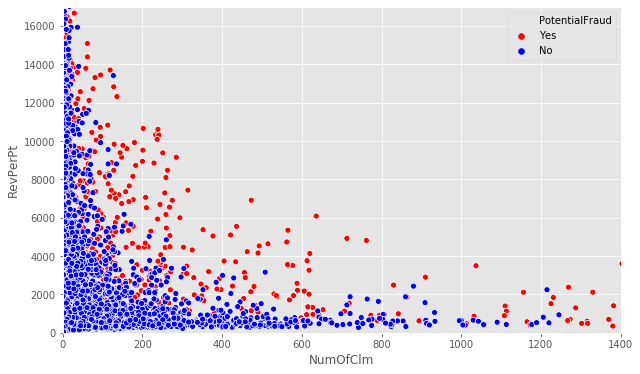

In [14]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x = 'NumOfClm', y = 'RevPerPt', hue = 'PotentialFraud',\
               data = df, palette = my_palette)
ax.set(xlim = (0, 1400),ylim = (0, 17000))
plt.show()

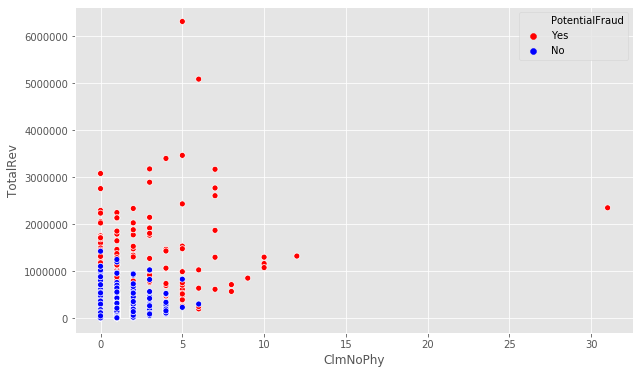

In [36]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x = 'ClmNoPhy', y = 'TotalRev', hue = 'PotentialFraud',\
               data = df, palette = my_palette)
#ax.set(xlim = (0,15), ylim = (0,4000000))
plt.show()

In [16]:
unsup = df[['AvgDuration', 'ClmPerPt', 'RevPerPt','ClmNoPhy','ClmAllPhy']].copy()

In [17]:
unsup.shape

(5410, 5)

In [18]:
kmeans = KMeans()

kmeans.set_params(n_clusters=2)
kmeans.fit(unsup)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
kmeans.cluster_centers_

array([[1.62274675e+00, 1.35643726e+00, 1.03490004e+03, 2.96723676e-01,
        8.77354214e+00],
       [5.42263914e+00, 1.06946140e+00, 1.13429273e+04, 7.71992819e-02,
        2.65170557e+00]])

In [20]:
#kmeans.set_params(n_clusters=2)
#kmeans.fit(x)

In [21]:
a = kmeans.labels_
a

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [22]:
unique_elements, counts_elements = np.unique(a, return_counts=True)

In [23]:
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [4853  557]]


In [24]:
from sklearn.decomposition import PCA
pca = PCA()
unsup2 = pca.set_params(n_components=2).fit_transform(unsup)

In [25]:
kmeans.fit(unsup2)
b = kmeans.labels_
b

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [26]:
unique_elements2, counts_elements2 = np.unique(b, return_counts=True)

In [27]:
print(np.asarray((unique_elements2, counts_elements2)))

[[   0    1]
 [4853  557]]


In [28]:
df['kmeans_labels'] = b

In [29]:
df.head()

,Provider,PotentialFraud,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,kmeans_labels
0,PRV51003,Yes,3.67,117,132,1.13,671956,5743.21,0,4,0
1,PRV51005,Yes,1.09,495,1165,2.35,284610,574.97,2,98,0
2,PRV51021,Yes,2.00,208,257,1.24,380322,1828.47,1,17,0
3,PRV51037,Yes,1.53,206,454,2.20,367754,1785.21,3,37,0
4,PRV51052,Yes,2.28,37,46,1.24,33146,895.84,0,3,0


In [31]:
x = df[['PotentialFraud', 'kmeans_labels']]

In [32]:
x['PotentialFraud'].describe()

count     5410
unique       2
top         No
freq      4904
Name: PotentialFraud, dtype: object

In [33]:
x['kmeans_labels'].unique()

array([0, 1], dtype=int32)

In [ ]:
from PlottingFunctions import plot_inertia, plot_silhouette